## 1.Importing the libraries and exploring the data.

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score,roc_auc_score
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.preprocessing import StandardScaler,LabelEncoder

In [3]:
data = pd.read_csv('bank-additional-full.csv')
data.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,no


In [4]:
data.sample(10)

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,y
38875,32,technician,married,university.degree,no,yes,no,cellular,nov,mon,no
39625,82,retired,married,high.school,unknown,yes,no,cellular,may,mon,no
19158,35,admin.,married,university.degree,no,yes,no,cellular,aug,tue,no
10962,58,management,unknown,university.degree,no,no,no,telephone,jun,wed,no
25597,32,admin.,single,university.degree,no,no,no,telephone,nov,wed,no
12014,45,technician,single,professional.course,unknown,yes,yes,telephone,jun,thu,no
4400,35,blue-collar,divorced,high.school,unknown,yes,no,telephone,may,tue,no
36041,34,admin.,single,university.degree,no,no,no,cellular,may,tue,no
15508,38,entrepreneur,married,basic.9y,no,no,no,cellular,jul,fri,no
17268,45,blue-collar,married,basic.4y,no,no,no,cellular,jul,fri,no


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   age          41188 non-null  int64 
 1   job          41188 non-null  object
 2   marital      41188 non-null  object
 3   education    41188 non-null  object
 4   default      41188 non-null  object
 5   housing      41188 non-null  object
 6   loan         41188 non-null  object
 7   contact      41188 non-null  object
 8   month        41188 non-null  object
 9   day_of_week  41188 non-null  object
 10  y            41188 non-null  object
dtypes: int64(1), object(10)
memory usage: 3.5+ MB


In [6]:
data.describe()

,age
count,41188.00000
mean,40.02406
std,10.42125
min,17.00000
25%,32.00000
50%,38.00000
75%,47.00000
max,98.00000


In [7]:
data.duplicated().value_counts()

False    34127
True      7061
dtype: int64

In [8]:
data.isnull().sum().sum()

0

In [9]:
categories = data.drop(['age'],axis=1)

for col in categories.columns:
    print("#",col,":")
    print(data[col].value_counts())
    print("--------------------------------\n")

# job :
admin.           10422
blue-collar       9254
technician        6743
services          3969
management        2924
retired           1720
entrepreneur      1456
self-employed     1421
housemaid         1060
unemployed        1014
student            875
unknown            330
Name: job, dtype: int64
--------------------------------

# marital :
married     24928
single      11568
divorced     4612
unknown        80
Name: marital, dtype: int64
--------------------------------

# education :
university.degree      12168
high.school             9515
basic.9y                6045
professional.course     5243
basic.4y                4176
basic.6y                2292
unknown                 1731
illiterate                18
Name: education, dtype: int64
--------------------------------

# default :
no         32588
unknown     8597
yes            3
Name: default, dtype: int64
--------------------------------

# housing :
yes        21576
no         18622
unknown      990
Name: housing,

#### This data set contains records relevant to a direct marketing campaign of a banking institution.
##### The Features Describe the Follwing:

- age: Customer Age (In years)
- job : type of job (From admin to student)
- marital : Marital status
- education
- default: has credit in default? 
- housing: has housing loan?
- loan: has personal loan?
- contact: contact communication type
- month: last contact month of year
- day_of_week: last contact day of the week 

- y - has the client subscribed a term deposit? `(Target Variable)` 

> Goal is to predict if the client will subscribe to the term deposit

Calculating the percentage of each category in each feature

In [10]:
for column in categories.columns:
    value_counts = categories[column].value_counts()
    percentage_values = (value_counts / len(categories)) * 100
    print(f"Percentage of values in {column}:\n{percentage_values}\n")

Percentage of values in job:
admin.           25.303486
blue-collar      22.467709
technician       16.371273
services          9.636302
management        7.099155
retired           4.175974
entrepreneur      3.535010
self-employed     3.450034
housemaid         2.573565
unemployed        2.461882
student           2.124405
unknown           0.801204
Name: job, dtype: float64

Percentage of values in marital:
married     60.522482
single      28.085850
divorced    11.197436
unknown      0.194231
Name: marital, dtype: float64

Percentage of values in education:
university.degree      29.542585
high.school            23.101389
basic.9y               14.676605
professional.course    12.729436
basic.4y               10.138875
basic.6y                5.564728
unknown                 4.202680
illiterate              0.043702
Name: education, dtype: float64

Percentage of values in default:
no         79.120132
unknown    20.872584
yes         0.007284
Name: default, dtype: float64

Percentag

#### Categorical Variables Analysis:
* ##### Job Roles:

At the forefront stands the "admin" group, claiming 25% of the workforce.. "Blue-collar" workers follow close behindwith over 22%. Technicians, representing 16%. Service industry roles, encompassing waiters, nurses, and the like, occupy nearly 10% of the population.

Management, while smaller in number constituting 7%. Retired individuals make up 4%. Entrepreneurs come in at 3.5%, while self-employed individuals with 3.4%. Housemaids and the unemployed hold smaller percentages, highlighting the diversity within the data.

* ##### Marital Status:

Love and commitment take center stage with "married" individuals forming the majority at 60%. Nearly 28% remain "single". "Divorced" individuals, at 11%, while a small 0.2% remain under the label "unknown."

* ##### Education:

University degrees held by almost 30% of the population. High school graduates follow closely behind with 23%. Basic education in various forms, spanning 9 and 4 years, encompasses nearly 25% of individuals. Professional courses, basic 6-year education, and the "unknown" category round out the spectrum.

* ##### Credit Ownership:

The vast majority, 79%, has no credit by default. However, 20% remain under "unknown". A negligible 0.007% have credit.

* ##### Housing and Loans:

52% has house loans. Nearly 45% has no loans, while a small 2.4% remain under "unknown." Loan involvement is present but not dominant, with 82% holding no loans and 15% actively carrying them. The remaining 2.4% fall under the "unknown" category.

* ##### Preferred Communication:

Reaching people on their mobile phones proves most effective, with 63% opting for "cellular" contact. Landlines still hold their own with 36%, offering an alternative channel for communication.

* ##### Seasonal Trends:

May is the busiest month, accounting for over 33% of activity. July and August follow it, suggesting a potential link to summertime activity or vacation periods. The remaining months see a gradual decline in engagement, with December bringing up the rear at a mere 0.4%.

* ##### Weekly Rhythm:

Thursdays emerge as the most active day, with 20.9% of interactions occurring then. Mondays and Wednesdays closely follow, showcasing a consistent mid-week buzz. Weekends see a slight dip in activity, with Fridays trailing at 19%.

- ##### Clients subscribtion to the campaign:
88.73% didn't subscribe to the campaign and the rest 11.27% subscribed to the campaign (`Biased Data Situation`).


> Duplicates in this data set is resonable because the features can vastly be shared by a reasonable number of customers.

#### `The next step will support our analysis with visualizations`




-------

## Step 2: Data Visualization

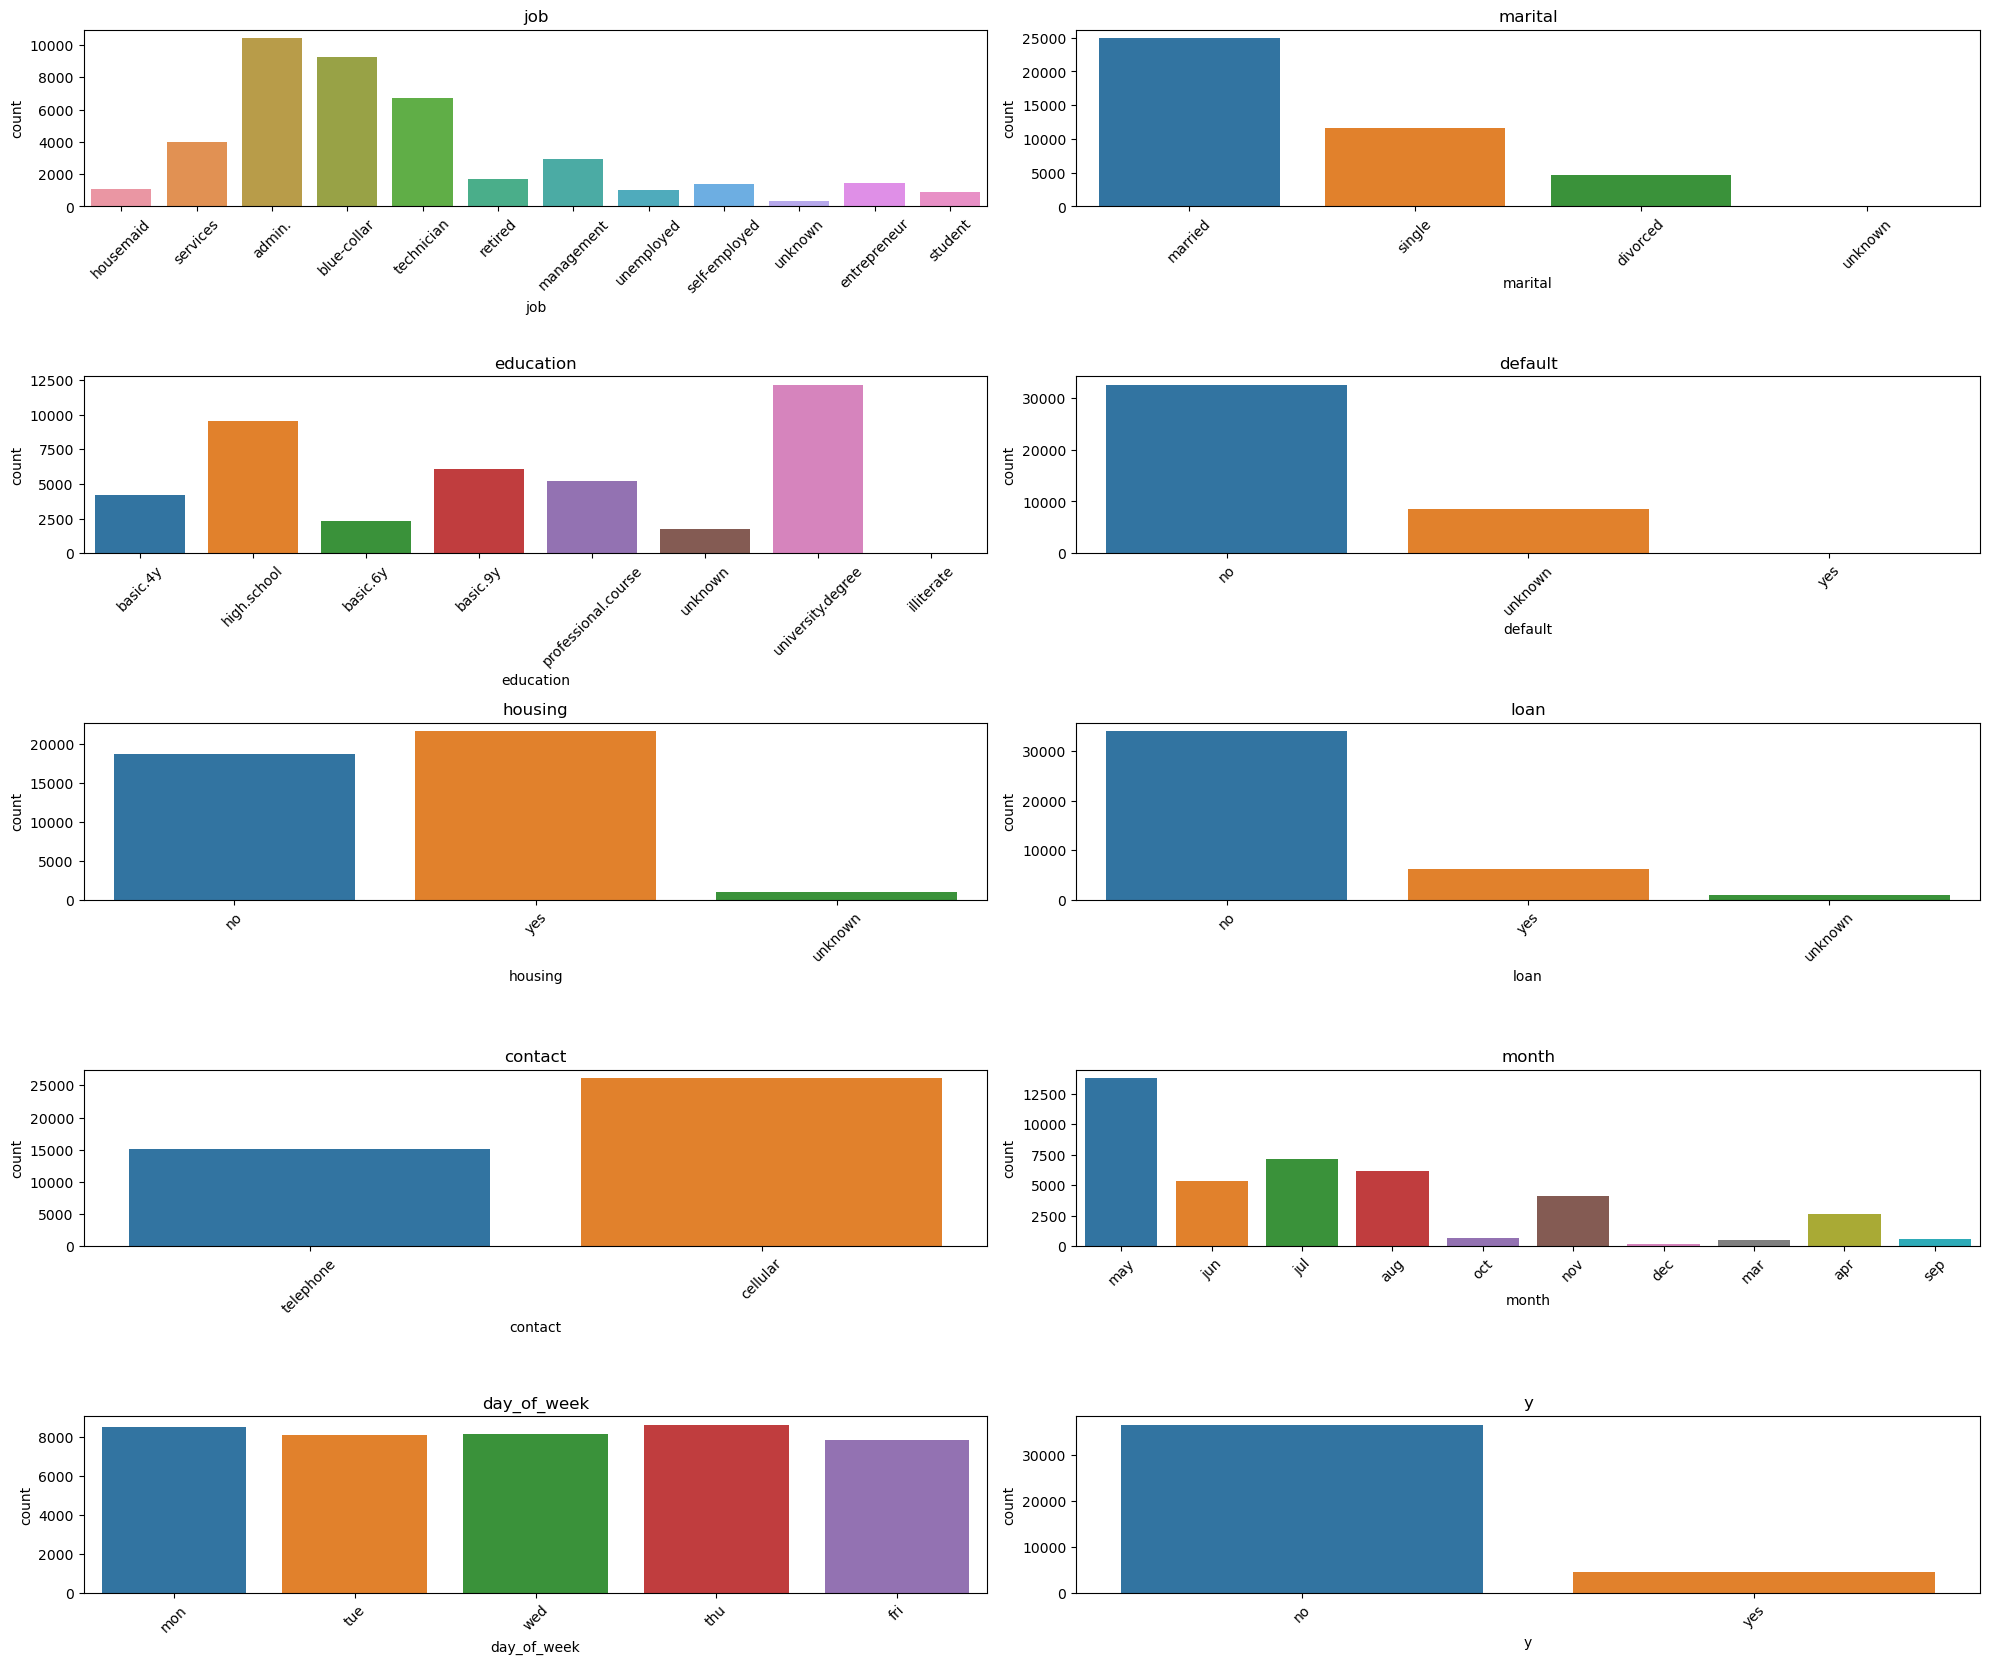

In [11]:
fig = plt.figure(figsize=(20, 30))
for idx, col in enumerate(categories.columns, 1):
    ax = fig.add_subplot(9, 2, idx)
    sns.countplot(x=data[col], ax=ax)
    plt.title(col)
    plt.xticks(rotation = 45)


plt.tight_layout()

C:\Users\Divo\AppData\Local\Temp\ipykernel_11088\573021116.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data['age'],kde=False)


<Axes: xlabel='age'>

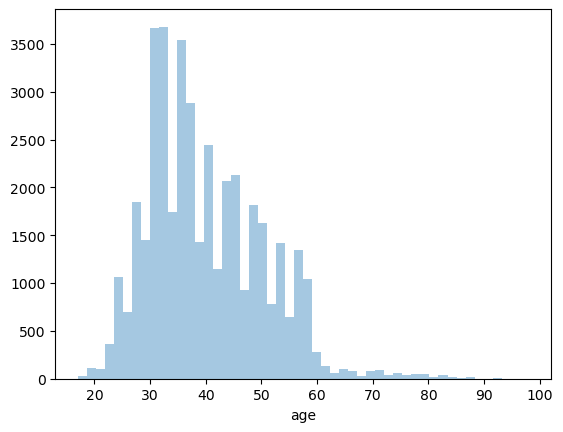

In [12]:
sns.distplot(data['age'],kde=False)

Transforming the age data using "Log Transformation" and "Square Root Transformation"

In [1]:

fig= plt.figure(figsize=(18,10))

ax=fig.add_subplot(2,2,1)
square_val = data['age']**(1/2)
sns.distplot(square_val,kde=True)
ax.set_title("Age Using Square Root Transformation")



ax=fig.add_subplot(2,2,2)
log_val = np.log1p(data['age'])
sns.distplot(log_val,kde=True)
ax.set_title("Age Using Log Transformation")

NameError: name 'plt' is not defined

##### Summary 
* The Bank has 41188 observations for bank customers.
* We have 11 Features: 10 independent and 1 dependent(`y`).
* We have 8 Categorical Variables: [job, marital, education, default, housing, loan, month, day_of_week]
* We have 2 boolean variables: [contanct, y]


Analyzing the features against the target variable

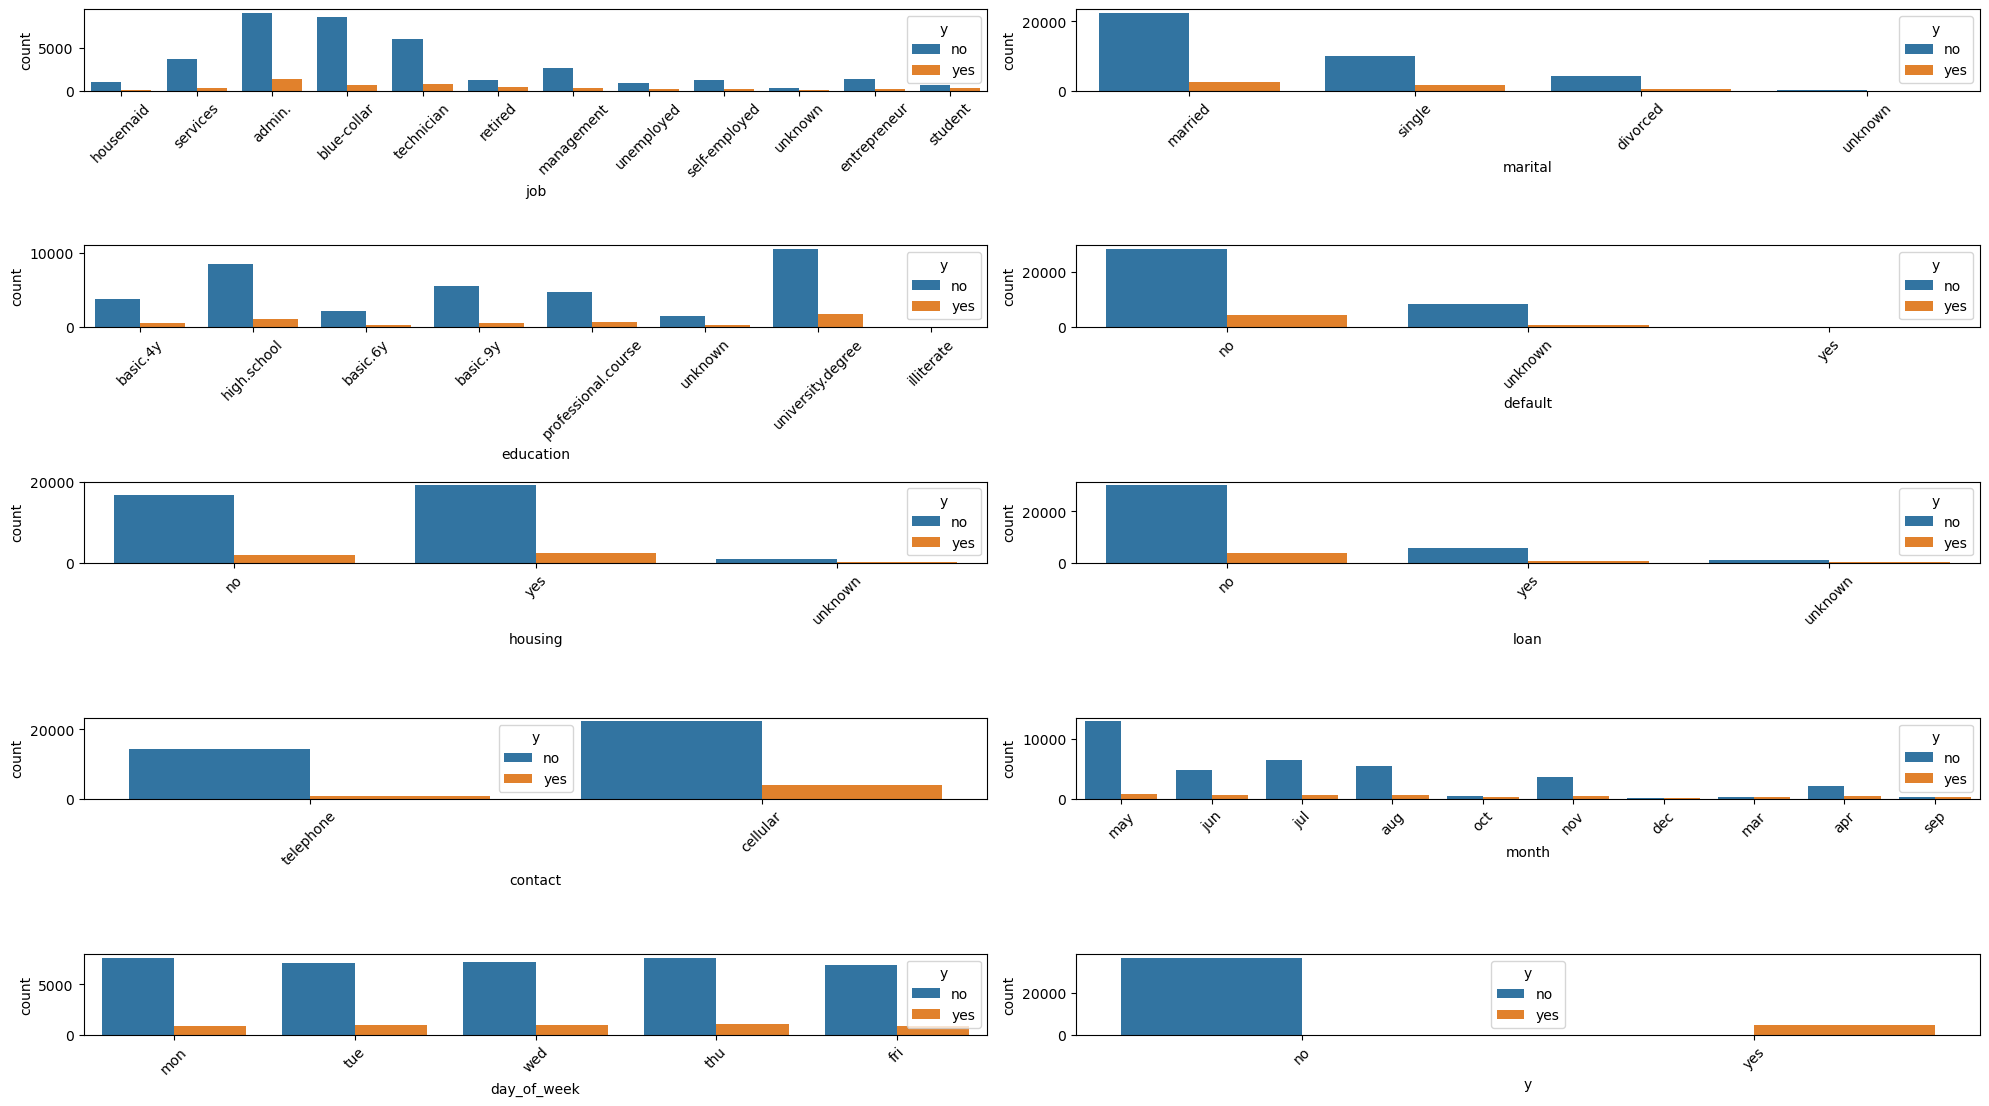

In [13]:
fig = plt.figure(figsize=(20, 20))
for idx, col in enumerate(categories.columns, 1):
    ax = fig.add_subplot(9, 2, idx)
    sns.countplot(x=col, hue="y", data=categories)
    plt.xticks(rotation=45)

plt.tight_layout()

Text(0.5, 1.0, 'Age against the target variable')

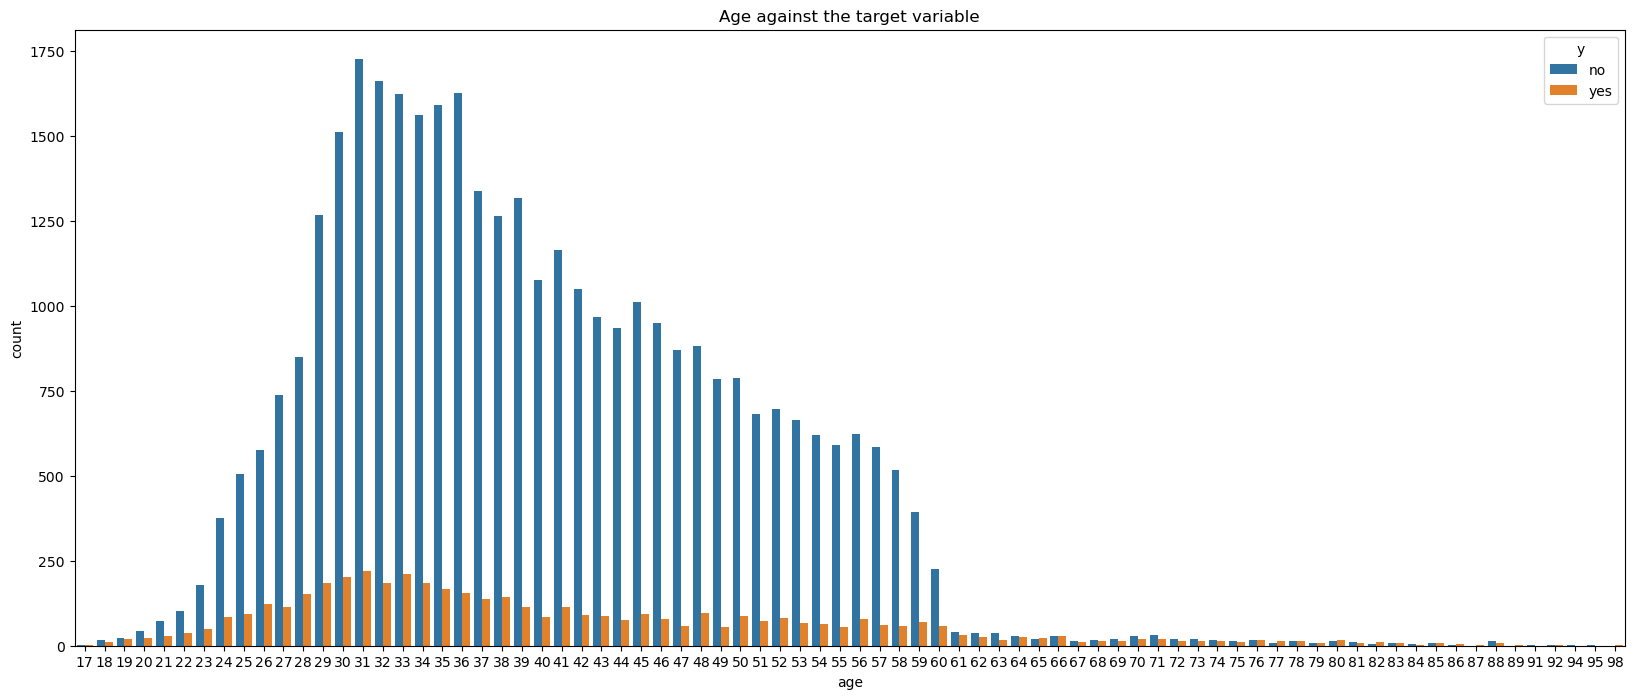

In [20]:
plt.figure(figsize=(20, 8))
sns.countplot(x='age', data=data, hue='y')
plt.title("Age against the target variable")

##### Demographics:
* High job: Customers in higher income brackets were significantly more likely to choose term deposits as their preferred savings option.
* Married customers: Married couples expressed a strong preference for the security and predictability of term deposits compared to other options.
* University degree customers: Individuals with university degrees demonstrated a greater interest in long-term investment strategies like term deposits.
##### Financial characteristics:
* Customers with no credit by default: Customers with established financial stability, as evidenced by their lack of existing credit, proved most receptive to term deposit offerings.
* Customers contacted on the cellular phone: Direct cellular phone outreach provided a highly effective channel for reaching customers interested in term deposit investment opportunities.

## Step 4: Plan of Attack.

The Dependent Variable `y` is biased where small amount of customers don't subscribe to term deposits from the bank, as show in the following plot:

<Axes: xlabel='y', ylabel='count'>

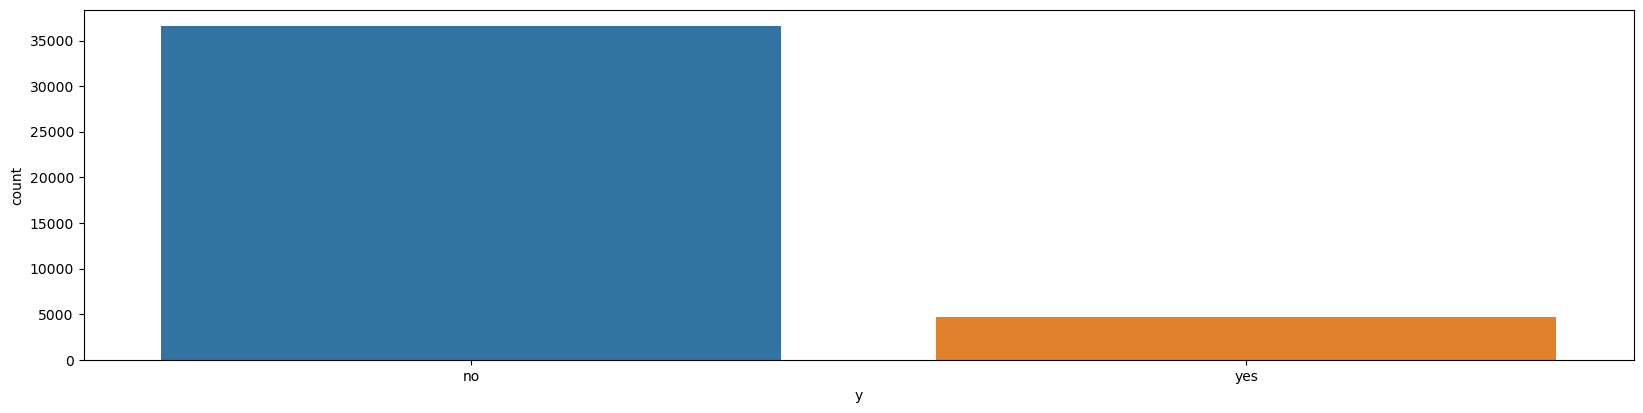

In [15]:
fig = plt.figure(figsize=(20, 10))
ax = fig.add_subplot(2, 1, 1)
sns.countplot(x=data['y'], ax=ax)

When dealing with biased datasets, where the distribution of classes is uneven, it's important to ensure that the train-test split preserves this bias. The goal is to have a representative proportion of each class in both the training and testing sets. The `stratify` parameter in scikit-learn's train_test_split function helps achieve this.

Also The best way to evaluate biased data predictions is with the F1 score, precision score and recall score.